![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/16.0.Transformers_for_Image_Classification.ipynb)

# Image Classification with Transformers

## Install Spark NLP

In [ ]:
!pip install -q pyspark==3.4.1 spark-nlp==5.1.2

In [2]:
import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.sql import functions as F
from pyspark.sql import SparkSession

spark = sparknlp.start()
spark

# 1. ViTForImageClassification Annotator

The Vision Transformer (ViT) model was proposed in ["An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale"](https://arxiv.org/pdf/2010.11929.pdf) written by Alexey Dosovitskiy et al. in 2021. It is the first paper that successfully trains a Transformer encoder on ImageNet, attaining very good results compared to familiar convolutional architectures.  

When pre-trained on large amounts of data and transferred to multiple mid-sized or small image recognition benchmarks (ImageNet, CIFAR-100, VTAB, etc.), Vision Transformer (ViT) attains excellent results compared to state-of-the-art convolutional networks while requiring substantially fewer computational resources to train.  

Inspired by the Transformer scaling successes in NLP, the researchers experimented with applying a standard Transformer directly to images, with the fewest possible modifications. To do so,  images are split into patches and the sequence of linear embeddings of these patches were provided as an input to a  Transformer. Image patches were actually treated the same way as tokens (words) in an NLP application. Image classification models were trained in supervised fashion.  

You can check [Scale Vision Transformers (ViT) Beyond Hugging Face](https://hackernoon.com/scale-vision-transformers-vit-beyond-hugging-face) article to learn deeper how ViT works and how it is implemeted in Spark NLP.




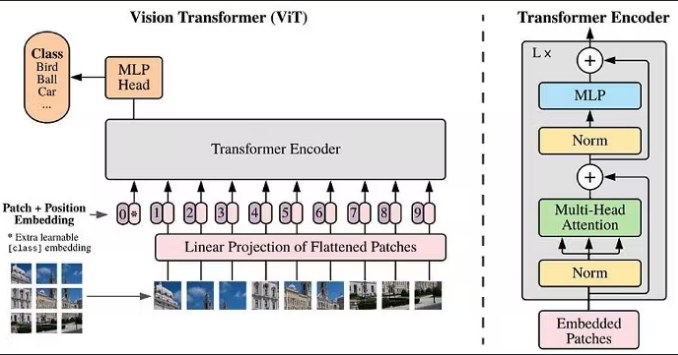






## Spark NLP vs HuggingFace Benchmarks


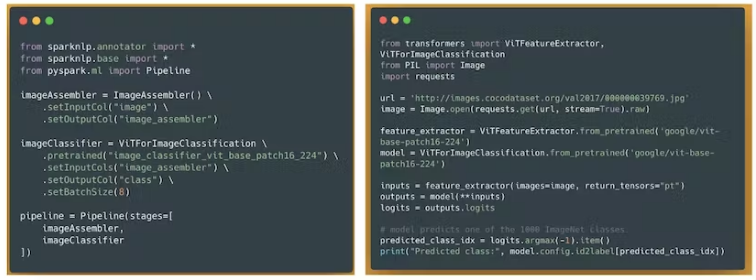


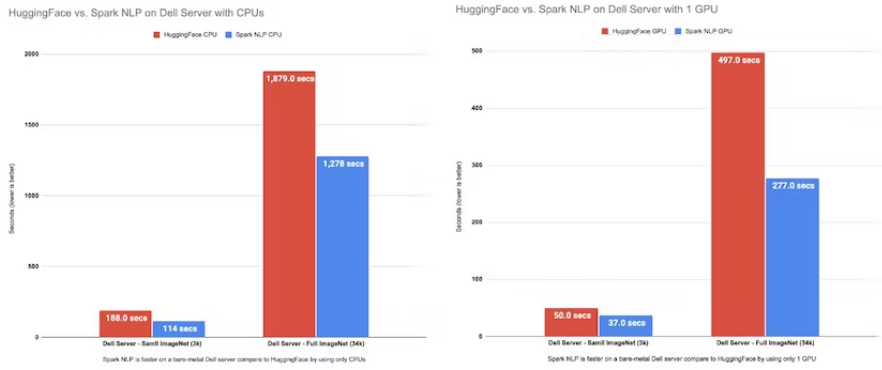

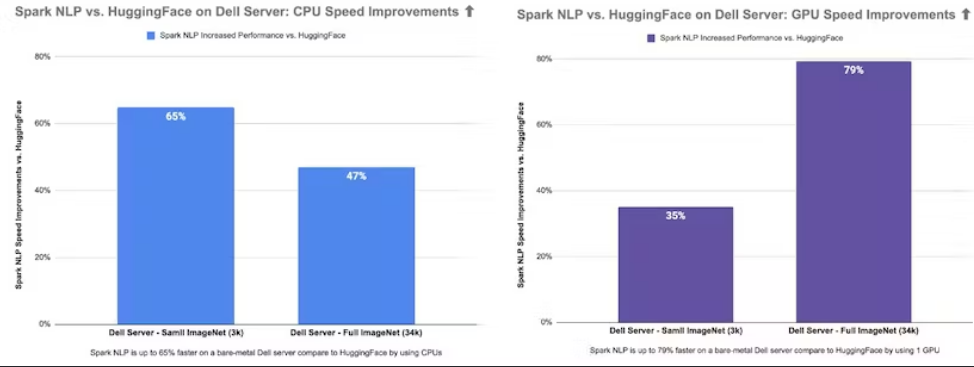

You can find all ViT models and more in [NLP Models Hub](https://nlp.johnsnowlabs.com/models?q=ViT&type=model&task=Image+Classification).

## ViT Models

|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [finvisualclf_vit_tickets](https://nlp.johnsnowlabs.com/2022/09/07/finvisualclf_vit_tickets_en.html)  | 62| [image_classifier_vit_base_patch16_224_in21k_bantai_v1](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch16_224_in21k_bantai_v1_en_3_0.html)  | 123| [image_classifier_vit_greens](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_greens_en_3_0.html)  | 184| [image_classifier_vit_rare_puppers_new_auth](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rare_puppers_new_auth_en_3_0.html)  |
| 2| [image_classifier_vit_ALL](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_ALL_en_3_0.html)  | 63| [image_classifier_vit_base_patch16_224_in21k_classify_4scence](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch16_224_in21k_classify_4scence_en_3_0.html)  | 124| [image_classifier_vit_gtsrb_model](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_gtsrb_model_en_3_0.html)  | 185| [image_classifier_vit_resnet_50_euroSat](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_resnet_50_euroSat_en_3_0.html)  |
| 3| [image_classifier_vit_ALL_2](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_ALL_2_en_3_0.html)  | 64| [image_classifier_vit_base_patch16_224_in21k_euroSat](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch16_224_in21k_euroSat_en_3_0.html)  | 125| [image_classifier_vit_hot_dog_or_sandwich](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_hot_dog_or_sandwich_en_3_0.html)  | 186| [image_classifier_vit_resnet_50_ucSat](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_resnet_50_ucSat_en_3_0.html)  |
| 4| [image_classifier_vit_ALL_94.5](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_ALL_94.5_en_3_0.html)  | 65| [image_classifier_vit_base_patch16_224_in21k_finetuned_cifar10](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch16_224_in21k_finetuned_cifar10_en_3_0.html)  | 126| [image_classifier_vit_hotdog_not_hotdog](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_hotdog_not_hotdog_en_3_0.html)  | 187| [image_classifier_vit_road_good_damaged_condition](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_road_good_damaged_condition_en_3_0.html)  |
| 5| [image_classifier_vit_CarViT](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_CarViT_en_3_0.html)  | 66| [image_classifier_vit_base_patch16_224_in21k_snacks](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch16_224_in21k_snacks_en_3_0.html)  | 127| [image_classifier_vit_housing_categories](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_housing_categories_en_3_0.html)  | 188| [image_classifier_vit_robot2](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_robot2_en_3_0.html)  |
| 6| [image_classifier_vit_Check_Aligned_Teeth](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_Check_Aligned_Teeth_en_3_0.html)  | 67| [image_classifier_vit_base_patch16_224_in21k_ucSat](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch16_224_in21k_ucSat_en_3_0.html)  | 128| [image_classifier_vit_hugging_geese](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_hugging_geese_en_3_0.html)  | 189| [image_classifier_vit_robot22](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_robot22_en_3_0.html)  |
| 7| [image_classifier_vit_Check_GoodBad_Teeth](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_Check_GoodBad_Teeth_en_3_0.html)  | 68| [image_classifier_vit_base_patch16_224_recylce_ft](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch16_224_recylce_ft_en_3_0.html)  | 129| [image_classifier_vit_huggingpics_package_demo_2](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_huggingpics_package_demo_2_en_3_0.html)  | 190| [image_classifier_vit_rock_challenge_DeiT_solo](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rock_challenge_DeiT_solo_en_3_0.html)  |
| 8| [image_classifier_vit_Check_Gum_Teeth](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_Check_Gum_Teeth_en_3_0.html)  | 69| [image_classifier_vit_base_patch16_384](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch16_384_en_3_0.html)  | 130| [image_classifier_vit_ice_cream](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_ice_cream_en_3_0.html)  | 191| [image_classifier_vit_rock_challenge_DeiT_solo_2](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rock_challenge_DeiT_solo_2_en_3_0.html)  |
| 9| [image_classifier_vit_Check_Missing_Teeth](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_Check_Missing_Teeth_en_3_0.html)  | 70| [image_classifier_vit_base_patch32_384](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch32_384_en_3_0.html)  | 131| [image_classifier_vit_iiif_manuscript_](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_iiif_manuscript__en_3_0.html)  | 192| [image_classifier_vit_rock_challenge_ViT_two_by_two](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rock_challenge_ViT_two_by_two_en_3_0.html)  |
| 10| [image_classifier_vit_Infrastructures](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_Infrastructures_en_3_0.html)  | 71| [image_classifier_vit_base_patch32_384_finetuned_eurosat](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch32_384_finetuned_eurosat_en_3_0.html)  | 132| [image_classifier_vit_indian_snacks](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_indian_snacks_en_3_0.html)  | 193| [image_classifier_vit_roomclassifier](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_roomclassifier_en_3_0.html)  |
| 11| [image_classifier_vit_Insectodoptera](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_Insectodoptera_en_3_0.html)  | 72| [image_classifier_vit_base_xray_pneumonia](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_xray_pneumonia_en_3_0.html)  | 133| [image_classifier_vit_koala_panda_wombat](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_koala_panda_wombat_en_3_0.html)  | 194| [image_classifier_vit_roomidentifier](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_roomidentifier_en_3_0.html)  |
| 12| [image_classifier_vit_PANDA_ViT](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_PANDA_ViT_en_3_0.html)  | 73| [image_classifier_vit_baseball_stadium_foods](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_baseball_stadium_foods_en_3_0.html)  | 134| [image_classifier_vit_lawn_weeds](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_lawn_weeds_en_3_0.html)  | 195| [image_classifier_vit_rust_image_classification_1](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rust_image_classification_1_en_3_0.html)  |
| 13| [image_classifier_vit_PanJuOffset_TwoClass](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_PanJuOffset_TwoClass_en_3_0.html)  | 74| [image_classifier_vit_beer_vs_wine](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_beer_vs_wine_en_3_0.html)  | 135| [image_classifier_vit_llama_alpaca_guanaco_vicuna](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_llama_alpaca_guanaco_vicuna_en_3_0.html)  | 196| [image_classifier_vit_rust_image_classification_10](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rust_image_classification_10_en_3_0.html)  |
| 14| [image_classifier_vit_SDO_VT1](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_SDO_VT1_en_3_0.html)  | 75| [image_classifier_vit_beer_whisky_wine_detection](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_beer_whisky_wine_detection_en_3_0.html)  | 136| [image_classifier_vit_llama_alpaca_snake](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_llama_alpaca_snake_en_3_0.html)  | 197| [image_classifier_vit_rust_image_classification_11](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rust_image_classification_11_en_3_0.html)  |
| 15| [image_classifier_vit_Teeth_A](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_Teeth_A_en_3_0.html)  | 76| [image_classifier_vit_blocks](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_blocks_en_3_0.html)  | 137| [image_classifier_vit_llama_or_potato](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_llama_or_potato_en_3_0.html)  | 198| [image_classifier_vit_rust_image_classification_12](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rust_image_classification_12_en_3_0.html)  |
| 16| [image_classifier_vit_Teeth_B](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_Teeth_B_en_3_0.html)  | 77| [image_classifier_vit_cifar10](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_cifar10_en_3_0.html)  | 138| [image_classifier_vit_llama_or_what](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_llama_or_what_en_3_0.html)  | 199| [image_classifier_vit_rust_image_classification_2](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rust_image_classification_2_en_3_0.html)  |
| 17| [image_classifier_vit_Teeth_C](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_Teeth_C_en_3_0.html)  | 78| [image_classifier_vit_cifar_10_2](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_cifar_10_2_en_3_0.html)  | 139| [image_classifier_vit_lotr](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_lotr_en_3_0.html)  | 200| [image_classifier_vit_rust_image_classification_3](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rust_image_classification_3_en_3_0.html)  |
| 18| [image_classifier_vit_Test_Model](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_Test_Model_en_3_0.html)  | 79| [image_classifier_vit_computer_stuff](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_computer_stuff_en_3_0.html)  | 140| [image_classifier_vit_lucky_model](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_lucky_model_en_3_0.html)  | 201| [image_classifier_vit_rust_image_classification_4](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rust_image_classification_4_en_3_0.html)  |
| 19| [image_classifier_vit_Tomato_Leaf_Classifier](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_Tomato_Leaf_Classifier_en_3_0.html)  | 80| [image_classifier_vit_croupier_creature_classifier](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_croupier_creature_classifier_en_3_0.html)  | 141| [image_classifier_vit_lung_cancer](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_lung_cancer_en_3_0.html)  | 202| [image_classifier_vit_rust_image_classification_5](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rust_image_classification_5_en_3_0.html)  |
| 20| [image_classifier_vit_VIT_Basic](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_VIT_Basic_en_3_0.html)  | 81| [image_classifier_vit_deit_base_patch16_224](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_deit_base_patch16_224_en_3_0.html)  | 142| [image_classifier_vit_mit_indoor_scenes](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_mit_indoor_scenes_en_3_0.html)  | 203| [image_classifier_vit_rust_image_classification_6](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rust_image_classification_6_en_3_0.html)  |
| 21| [image_classifier_vit_ViTFineTuned](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_ViTFineTuned_en_3_0.html)  | 82| [image_classifier_vit_deit_flyswot](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_deit_flyswot_en_3_0.html)  | 143| [image_classifier_vit_modelversion01](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_modelversion01_en_3_0.html)  | 204| [image_classifier_vit_rust_image_classification_7](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rust_image_classification_7_en_3_0.html)  |
| 22| [image_classifier_vit_ViT_FaceMask_Finetuned](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_ViT_FaceMask_Finetuned_en_3_0.html)  | 83| [image_classifier_vit_deit_small_patch16_224](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_deit_small_patch16_224_en_3_0.html)  | 144| [image_classifier_vit_modeversion1_m6_e4](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_modeversion1_m6_e4_en_3_0.html)  | 205| [image_classifier_vit_rust_image_classification_8](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rust_image_classification_8_en_3_0.html)  |
| 23| [image_classifier_vit_Visual_transformer_chihuahua_cookies](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_Visual_transformer_chihuahua_cookies_en_3_0.html)  | 84| [image_classifier_vit_deit_tiny_patch16_224](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_deit_tiny_patch16_224_en_3_0.html)  | 145| [image_classifier_vit_modeversion1_m6_e4n](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_modeversion1_m6_e4n_en_3_0.html)  | 206| [image_classifier_vit_rust_image_classification_9](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rust_image_classification_9_en_3_0.html)  |
| 24| [image_classifier_vit_WEC_types](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_WEC_types_en_3_0.html)  | 85| [image_classifier_vit_demo](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_demo_en_3_0.html)  | 146| [image_classifier_vit_modeversion1_m7_e4](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_modeversion1_m7_e4_en_3_0.html)  | 207| [image_classifier_vit_sea_mammals](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_sea_mammals_en_3_0.html)  |
| 25| [image_classifier_vit__beans](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit__beans_en_3_0.html)  | 86| [image_classifier_vit_denver_nyc_paris](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_denver_nyc_paris_en_3_0.html)  | 147| [image_classifier_vit_modeversion28_7](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_modeversion28_7_en_3_0.html)  | 208| [image_classifier_vit_shirt_identifier](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_shirt_identifier_en_3_0.html)  |
| 26| [image_classifier_vit__flyswot_test](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit__flyswot_test_en_3_0.html)  | 87| [image_classifier_vit_diam](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_diam_en_3_0.html)  | 148| [image_classifier_vit_modeversion2_m7_e8](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_modeversion2_m7_e8_en_3_0.html)  | 209| [image_classifier_vit_simple_kitchen](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_simple_kitchen_en_3_0.html)  |
| 27| [image_classifier_vit__spectrogram](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit__spectrogram_en_3_0.html)  | 88| [image_classifier_vit_digital](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_digital_en_3_0.html)  | 149| [image_classifier_vit_my_bean_VIT](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_my_bean_VIT_en_3_0.html)  | 210| [image_classifier_vit_skin_type](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_skin_type_en_3_0.html)  |
| 28| [image_classifier_vit__test_1_95](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit__test_1_95_en_3_0.html)  | 89| [image_classifier_vit_dog](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_dog_en_3_0.html)  | 150| [image_classifier_vit_new_exper3](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_new_exper3_en_3_0.html)  | 211| [image_classifier_vit_snacks](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_snacks_en_3_0.html)  |
| 29| [image_classifier_vit_age_classifier](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_age_classifier_en_3_0.html)  | 90| [image_classifier_vit_dog_breed_classifier](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_dog_breed_classifier_en_3_0.html)  | 151| [image_classifier_vit_new_york_tokyo_london](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_new_york_tokyo_london_en_3_0.html)  | 212| [image_classifier_vit_south_indian_foods](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_south_indian_foods_en_3_0.html)  |
| 30| [image_classifier_vit_airplanes](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_airplanes_en_3_0.html)  | 91| [image_classifier_vit_dog_food__base_patch16_224_in21k](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_dog_food__base_patch16_224_in21k_en_3_0.html)  | 152| [image_classifier_vit_occupation_prediction](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_occupation_prediction_en_3_0.html)  | 213| [image_classifier_vit_string_instrument_detector](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_string_instrument_detector_en_3_0.html)  |
| 31| [image_classifier_vit_ak__base_patch16_224_in21k_image_classification](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_ak__base_patch16_224_in21k_image_classification_en_3_0.html)  | 92| [image_classifier_vit_dog_races](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_dog_races_en_3_0.html)  | 153| [image_classifier_vit_opencampus_age_detection](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_opencampus_age_detection_en_3_0.html)  | 214| [image_classifier_vit_taco_or_what](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_taco_or_what_en_3_0.html)  |
| 32| [image_classifier_vit_amgerindaf](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_amgerindaf_en_3_0.html)  | 93| [image_classifier_vit_dog_vs_chicken](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_dog_vs_chicken_en_3_0.html)  | 154| [image_classifier_vit_orcs_and_friends](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_orcs_and_friends_en_3_0.html)  | 215| [image_classifier_vit_teeth_test](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_teeth_test_en_3_0.html)  |
| 33| [image_classifier_vit_animal_classifier](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_animal_classifier_en_3_0.html)  | 94| [image_classifier_vit_doggos_lol](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_doggos_lol_en_3_0.html)  | 155| [image_classifier_vit_oz_fauna](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_oz_fauna_en_3_0.html)  | 216| [image_classifier_vit_teeth_verify](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_teeth_verify_en_3_0.html)  |
| 34| [image_classifier_vit_animal_classifier_huggingface](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_animal_classifier_huggingface_en_3_0.html)  | 95| [image_classifier_vit_dogs](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_dogs_en_3_0.html)  | 156| [image_classifier_vit_pasta_pizza_ravioli](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pasta_pizza_ravioli_en_3_0.html)  | 217| [image_classifier_vit_test](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_test_en_3_0.html)  |
| 35| [image_classifier_vit_animals_classifier](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_animals_classifier_en_3_0.html)  | 96| [image_classifier_vit_dwarf_goats](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_dwarf_goats_en_3_0.html)  | 157| [image_classifier_vit_pasta_shapes](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pasta_shapes_en_3_0.html)  | 218| [image_classifier_vit_test_model_a](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_test_model_a_en_3_0.html)  |
| 36| [image_classifier_vit_anomaly](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_anomaly_en_3_0.html)  | 97| [image_classifier_vit_electric_2](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_electric_2_en_3_0.html)  | 158| [image_classifier_vit_places](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_places_en_3_0.html)  | 219| [image_classifier_vit_tiny__random](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_tiny__random_en_3_0.html)  |
| 37| [image_classifier_vit_apes](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_apes_en_3_0.html)  | 98| [image_classifier_vit_electric_pole_type_classification](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_electric_pole_type_classification_en_3_0.html)  | 159| [image_classifier_vit_planes_airlines](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_planes_airlines_en_3_0.html)  | 220| [image_classifier_vit_tiny_patch16_224](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_tiny_patch16_224_en_3_0.html)  |
| 38| [image_classifier_vit_architectural_styles](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_architectural_styles_en_3_0.html)  | 99| [image_classifier_vit_ex_for_evan](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_ex_for_evan_en_3_0.html)  | 160| [image_classifier_vit_planes_trains_automobiles](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_planes_trains_automobiles_en_3_0.html)  | 221| [image_classifier_vit_tiny_random](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_tiny_random_en_3_0.html)  |
| 39| [image_classifier_vit_asl](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_asl_en_3_0.html)  | 100| [image_classifier_vit_exper1_mesum5](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_exper1_mesum5_en_3_0.html)  | 161| [image_classifier_vit_platzi__base_beans_omar_espejel](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_platzi__base_beans_omar_espejel_en_3_0.html)  | 222| [image_classifier_vit_tiny_random__finetuned_eurosat](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_tiny_random__finetuned_eurosat_en_3_0.html)  |
| 40| [image_classifier_vit_autotrain_cifar10__base](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_autotrain_cifar10__base_en_3_0.html)  | 101| [image_classifier_vit_exper2_mesum5](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_exper2_mesum5_en_3_0.html)  | 162| [image_classifier_vit_pneumonia_bielefeld_dl_course](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pneumonia_bielefeld_dl_course_en_3_0.html)  | 223| [image_classifier_vit_trainer_rare_puppers](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_trainer_rare_puppers_en_3_0.html)  |
| 41| [image_classifier_vit_autotrain_dog_vs_food](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_autotrain_dog_vs_food_en_3_0.html)  | 102| [image_classifier_vit_exper3_mesum5](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_exper3_mesum5_en_3_0.html)  | 163| [image_classifier_vit_pneumonia_test_attempt](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pneumonia_test_attempt_en_3_0.html)  | 224| [image_classifier_vit_upside_down_classifier](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_upside_down_classifier_en_3_0.html)  |
| 42| [image_classifier_vit_autotrain_fashion_mnist__base](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_autotrain_fashion_mnist__base_en_3_0.html)  | 103| [image_classifier_vit_exper4_mesum5](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_exper4_mesum5_en_3_0.html)  | 164| [image_classifier_vit_pond](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pond_en_3_0.html)  | 225| [image_classifier_vit_vc_bantai__withoutAMBI](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_vc_bantai__withoutAMBI_en_3_0.html)  |
| 43| [image_classifier_vit_baked_goods](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_baked_goods_en_3_0.html)  | 104| [image_classifier_vit_exper5_mesum5](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_exper5_mesum5_en_3_0.html)  | 165| [image_classifier_vit_pond_image_classification_1](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pond_image_classification_1_en_3_0.html)  | 226| [image_classifier_vit_vc_bantai__withoutAMBI_adunest](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_vc_bantai__withoutAMBI_adunest_en_3_0.html)  |
| 44| [image_classifier_vit_base_avengers_v1](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_avengers_v1_en_3_0.html)  | 105| [image_classifier_vit_exper6_mesum5](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_exper6_mesum5_en_3_0.html)  | 166| [image_classifier_vit_pond_image_classification_10](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pond_image_classification_10_en_3_0.html)  | 227| [image_classifier_vit_vc_bantai__withoutAMBI_adunest_trial](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_vc_bantai__withoutAMBI_adunest_trial_en_3_0.html)  |
| 45| [image_classifier_vit_base_beans](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_beans_en_3_0.html)  | 106| [image_classifier_vit_exper7_mesum5](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_exper7_mesum5_en_3_0.html)  | 167| [image_classifier_vit_pond_image_classification_11](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pond_image_classification_11_en_3_0.html)  | 228| [image_classifier_vit_vc_bantai__withoutAMBI_adunest_v1](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_vc_bantai__withoutAMBI_adunest_v1_en_3_0.html)  |
| 46| [image_classifier_vit_base_beans_demo](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_beans_demo_en_3_0.html)  | 107| [image_classifier_vit_exper_batch_16_e4](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_exper_batch_16_e4_en_3_0.html)  | 168| [image_classifier_vit_pond_image_classification_12](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pond_image_classification_12_en_3_0.html)  | 229| [image_classifier_vit_vc_bantai__withoutAMBI_adunest_v2](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_vc_bantai__withoutAMBI_adunest_v2_en_3_0.html)  |
| 47| [image_classifier_vit_base_beans_demo_v2](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_beans_demo_v2_en_3_0.html)  | 108| [image_classifier_vit_exper_batch_16_e8](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_exper_batch_16_e8_en_3_0.html)  | 169| [image_classifier_vit_pond_image_classification_2](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pond_image_classification_2_en_3_0.html)  | 230| [image_classifier_vit_vc_bantai__withoutAMBI_adunest_v3](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_vc_bantai__withoutAMBI_adunest_v3_en_3_0.html)  |
| 48| [image_classifier_vit_base_beans_demo_v3](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_beans_demo_v3_en_3_0.html)  | 109| [image_classifier_vit_exper_batch_32_e4](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_exper_batch_32_e4_en_3_0.html)  | 170| [image_classifier_vit_pond_image_classification_3](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pond_image_classification_3_en_3_0.html)  | 231| [image_classifier_vit_violation_classification_bantai_](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_violation_classification_bantai__en_3_0.html)  |
| 49| [image_classifier_vit_base_beans_demo_v5](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_beans_demo_v5_en_3_0.html)  | 110| [image_classifier_vit_exper_batch_32_e8](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_exper_batch_32_e8_en_3_0.html)  | 171| [image_classifier_vit_pond_image_classification_4](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pond_image_classification_4_en_3_0.html)  | 232| [image_classifier_vit_violation_classification_bantai__v100ep](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_violation_classification_bantai__v100ep_en_3_0.html)  |
| 50| [image_classifier_vit_base_cats_vs_dogs](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_cats_vs_dogs_en_3_0.html)  | 111| [image_classifier_vit_exper_batch_8_e4](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_exper_batch_8_e4_en_3_0.html)  | 172| [image_classifier_vit_pond_image_classification_5](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pond_image_classification_5_en_3_0.html)  | 233| [image_classifier_vit_violation_classification_bantai__v80ep](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_violation_classification_bantai__v80ep_en_3_0.html)  |
| 51| [image_classifier_vit_base_cifar10](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_cifar10_en_3_0.html)  | 112| [image_classifier_vit_exper_batch_8_e8](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_exper_batch_8_e8_en_3_0.html)  | 173| [image_classifier_vit_pond_image_classification_6](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pond_image_classification_6_en_3_0.html)  | 234| [image_classifier_vit_violation_classification_bantai__withES](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_violation_classification_bantai__withES_en_3_0.html)  |
| 52| [image_classifier_vit_base_food101](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_food101_en_3_0.html)  | 113| [image_classifier_vit_fancy_animales](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_fancy_animales_en_3_0.html)  | 174| [image_classifier_vit_pond_image_classification_7](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pond_image_classification_7_en_3_0.html)  | 235| [image_classifier_vit_vision_transformer_fmri_classification_ft](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_vision_transformer_fmri_classification_ft_en_3_0.html)  |
| 53| [image_classifier_vit_base_movie_scenes_v1](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_movie_scenes_v1_en_3_0.html)  | 114| [image_classifier_vit_finetuned_cats_dogs](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_finetuned_cats_dogs_en_3_0.html)  | 175| [image_classifier_vit_pond_image_classification_8](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pond_image_classification_8_en_3_0.html)  | 236| [image_classifier_vit_vision_transformer_v3](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_vision_transformer_v3_en_3_0.html)  |
| 54| [image_classifier_vit_base_mri](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_mri_en_3_0.html)  | 115| [image_classifier_vit_finetuned_chest_xray_pneumonia](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_finetuned_chest_xray_pneumonia_en_3_0.html)  | 176| [image_classifier_vit_pond_image_classification_9](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_pond_image_classification_9_en_3_0.html)  | 237| [image_classifier_vit_vision_transformers_spain_or_italy_fan](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_vision_transformers_spain_or_italy_fan_en_3_0.html)  |
| 55| [image_classifier_vit_base_patch16_224](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch16_224_en_3_0.html)  | 116| [image_classifier_vit_finetuned_eurosat_kornia](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_finetuned_eurosat_kornia_en_3_0.html)  | 177| [image_classifier_vit_puppies_classify](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_puppies_classify_en_3_0.html)  | 238| [image_classifier_vit_vliegmachine](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_vliegmachine_en_3_0.html)  |
| 56| [image_classifier_vit_base_patch16_224_cifar10](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch16_224_cifar10_en_3_0.html)  | 117| [image_classifier_vit_flowers](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_flowers_en_3_0.html)  | 178| [image_classifier_vit_rare_bottle](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rare_bottle_en_3_0.html)  | 239| [image_classifier_vit_where_am_I_hospital_balcony_hallway_airport_coffee_house](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_where_am_I_hospital_balcony_hallway_airport_coffee_house_en_3_0.html)  |
| 57| [image_classifier_vit_base_patch16_224_finetuned_eurosat](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch16_224_finetuned_eurosat_en_3_0.html)  | 118| [image_classifier_vit_food](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_food_en_3_0.html)  | 179| [image_classifier_vit_rare_puppers](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rare_puppers_en_3_0.html)  | 240| [image_classifier_vit_where_am_I_hospital_balcony_hallway_airport_coffee_house_apartment_office](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_where_am_I_hospital_balcony_hallway_airport_coffee_house_apartment_office_en_3_0.html)  |
| 58| [image_classifier_vit_base_patch16_224_finetuned_kvasirv2_colonoscopy](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch16_224_finetuned_kvasirv2_colonoscopy_en_3_0.html)  | 119| [image_classifier_vit_fruits](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_fruits_en_3_0.html)  | 180| [image_classifier_vit_rare_puppers2](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rare_puppers2_en_3_0.html)  | 241| [image_classifier_vit_world_landmarks](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_world_landmarks_en_3_0.html)  |
| 59| [image_classifier_vit_base_patch16_224_finetuned_largerDataSet_docSeperator_more_labels_all_apache2](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch16_224_finetuned_largerDataSet_docSeperator_more_labels_all_apache2_en_3_0.html)  | 120| [image_classifier_vit_garbage_classification](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_garbage_classification_en_3_0.html)  | 181| [image_classifier_vit_rare_puppers3](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rare_puppers3_en_3_0.html)  |
| 60| [image_classifier_vit_base_patch16_224_finetuned_pneumothorax](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch16_224_finetuned_pneumothorax_en_3_0.html)  | 121| [image_classifier_vit_generation_xyz](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_generation_xyz_en_3_0.html)  | 182| [image_classifier_vit_rare_puppers_09_04_2021](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rare_puppers_09_04_2021_en_3_0.html)  |
| 61| [image_classifier_vit_base_patch16_224_in21k_aidSat](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_base_patch16_224_in21k_aidSat_en_3_0.html)  | 122| [image_classifier_vit_grain](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_grain_en_3_0.html)  | 183| [image_classifier_vit_rare_puppers_demo](https://nlp.johnsnowlabs.com/2022/08/10/image_classifier_vit_rare_puppers_demo_en_3_0.html)  |



You can find all ViT models and more in [NLP Models Hub](https://nlp.johnsnowlabs.com/models?q=ViT&type=model&task=Image+Classification).

## 2. Additional blogposts and videos:


*   [Vision Transformer (ViT) - Hugging Face](https://huggingface.co/docs/transformers/model_doc/vit)
*   [Vision Transformers (ViT) in Image Recognition – 2022 Guide](https://viso.ai/deep-learning/vision-transformer-vit/)
*   [Image Classification using Huggingface ViT | by Kenji Tee](https://medium.com/@kenjiteezhen/image-classification-using-huggingface-vit-261888bfa19f)
*   [Vision Transformer for Image Classification - Video](https://www.youtube.com/watch?v=HZ4j_U3FC94)
*   [Using Transformers for Image Classification | HuggingFace - Video](https://www.youtube.com/watch?v=Bjp7hebC67E)







## 3. Download Images

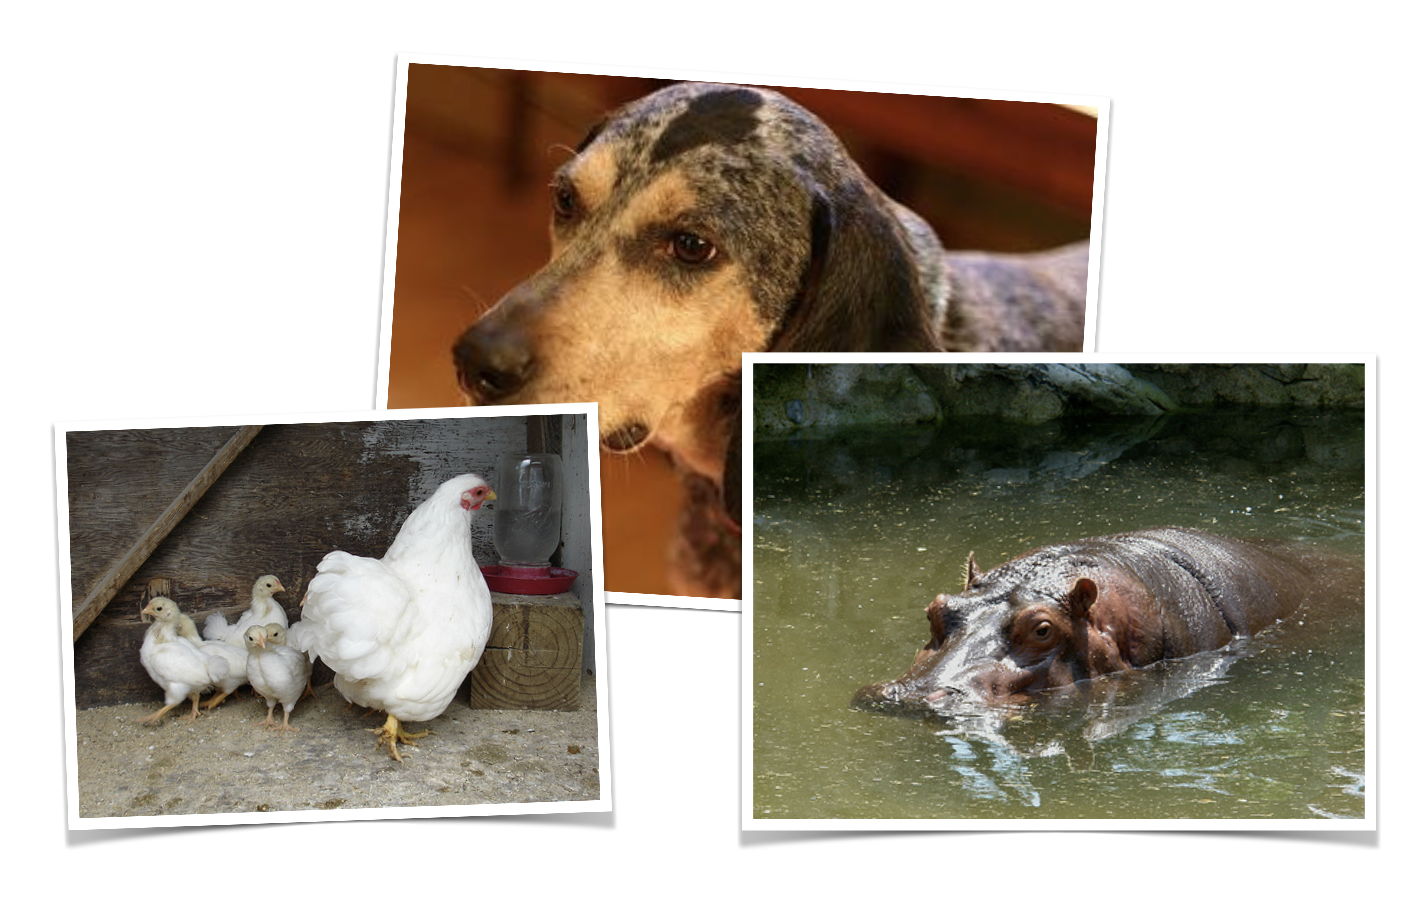

In [3]:
!wget -q https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/images/images.zip

In [4]:
import shutil
shutil.unpack_archive("images.zip", "images", "zip")

## 4. Pipeline with ViTForImageClassification

In [5]:
data_df = spark.read.format("image").option("dropInvalid", value = True).load(path="./images/images/")

In [6]:
image_assembler = ImageAssembler() \
    .setInputCol("image") \
    .setOutputCol("image_assembler")

image_classifier = ViTForImageClassification \
    .pretrained() \
    .setInputCols("image_assembler") \
    .setOutputCol("classes")

pipeline = Pipeline(
    stages=[
        image_assembler,
        image_classifier,
])

model = pipeline.fit(data_df)

image_classifier_vit_base_patch16_224 download started this may take some time.
Approximate size to download 309.7 MB
[OK!]


In [7]:
# let us check the counts of classes in this model

len(image_classifier.getClasses())

999

In [8]:
image_classifier.getClasses()

['turnstile',
 'damselfly',
 'mixing bowl',
 'sea snake',
 'cockroach, roach',
 'buckle',
 'beer glass',
 'bulbul',
 'lumbermill, sawmill',
 'whippet',
 'Australian terrier',
 'television, television system',
 'hoopskirt, crinoline',
 'horse cart, horse-cart',
 'guillotine',
 'malamute, malemute, Alaskan malamute',
 'coyote, prairie wolf, brush wolf, Canis latrans',
 'colobus, colobus monkey',
 'hognose snake, puff adder, sand viper',
 'sock',
 'burrito',
 'printer',
 'bathing cap, swimming cap',
 'chiton, coat-of-mail shell, sea cradle, polyplacophore',
 'Rottweiler',
 'cello, violoncello',
 'pitcher, ewer',
 'computer keyboard, keypad',
 'bow',
 'peacock',
 'ballplayer, baseball player',
 'refrigerator, icebox',
 'solar dish, solar collector, solar furnace',
 'passenger car, coach, carriage',
 'African chameleon, Chamaeleo chamaeleon',
 'oboe, hautboy, hautbois',
 'toyshop',
 'Leonberg',
 'howler monkey, howler',
 'bluetick',
 'African elephant, Loxodonta africana',
 'American lobste

Lets transform the data.

In [9]:
image_df = model.transform(data_df)

In [10]:
image_df.printSchema()

root
 |-- image: struct (nullable = true)
 |    |-- origin: string (nullable = true)
 |    |-- height: integer (nullable = true)
 |    |-- width: integer (nullable = true)
 |    |-- nChannels: integer (nullable = true)
 |    |-- mode: integer (nullable = true)
 |    |-- data: binary (nullable = true)
 |-- image_assembler: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- origin: string (nullable = true)
 |    |    |-- height: integer (nullable = false)
 |    |    |-- width: integer (nullable = false)
 |    |    |-- nChannels: integer (nullable = false)
 |    |    |-- mode: integer (nullable = false)
 |    |    |-- result: binary (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 |-- classes: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorTyp

In [11]:
image_df.show(truncate=40)

+----------------------------------------+----------------------------------------+----------------------------------------+
|                                   image|                         image_assembler|                                 classes|
+----------------------------------------+----------------------------------------+----------------------------------------+
|{file:///content/images/images/palace...|[{image, file:///content/images/image...|[{category, 0, 5, palace, {nChannels ...|
|{file:///content/images/images/egypti...|[{image, file:///content/images/image...|[{category, 0, 11, Egyptian cat, {nCh...|
|{file:///content/images/images/hippop...|[{image, file:///content/images/image...|[{category, 0, 55, hippopotamus, hipp...|
|{file:///content/images/images/hen.JP...|[{image, file:///content/images/image...|[{category, 0, 2, hen, {nChannels -> ...|
|{file:///content/images/images/ostric...|[{image, file:///content/images/image...|[{category, 0, 24, ostrich, Struthio ...|


Now we can check the classes.

In [12]:
image_df.select('classes').show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|classes                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [13]:
image_df.select(F.explode(F.arrays_zip(image_df.classes.metadata,
                                       image_df.classes.result)).alias("cols"))\
        .select(F.expr("cols['0']['origin']").alias("images"),
                F.expr("cols['0']['width']").alias("width"),
                F.expr("cols['0']['height']").alias("height"),
                F.expr("cols['1']").alias("class")).show(truncate=False)

+-----------------------------------------------+-----+------+--------------------------------------------------------+
|images                                         |width|height|class                                                   |
+-----------------------------------------------+-----+------+--------------------------------------------------------+
|file:///content/images/images/palace.JPEG      |500  |334   |palace                                                  |
|file:///content/images/images/egyptian_cat.jpeg|640  |480   |Egyptian cat                                            |
|file:///content/images/images/hippopotamus.JPEG|500  |333   |hippopotamus, hippo, river horse, Hippopotamus amphibius|
|file:///content/images/images/hen.JPEG         |500  |375   |hen                                                     |
|file:///content/images/images/ostrich.JPEG     |300  |400   |ostrich, Struthio camelus                               |
|file:///content/images/images/junco.JPE

## 5. Light Pipeline

To use light pipeline in ViT transformer, we need to use the new method [`fullAnnotateImage`](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/base/light_pipeline/index.html).

In [14]:
light_pipeline = LightPipeline(model)

image_list = ["/content/images/images/bluetick.jpg",
              "/content/images/images/palace.JPEG",
              "/content/images/images/hen.JPEG"]

annotations_result = light_pipeline.fullAnnotateImage(image_list)
annotations_result[0].keys()

dict_keys(['image_assembler', 'classes'])

In [15]:
import pandas as pd

file_name = []
classes = []

for i in annotations_result:

    file_name.append(i["image_assembler"][0].origin.split("/")[-1])
    classes.append(i["classes"][0].result)


df_images = pd.DataFrame({'file':file_name,
                          'class':classes})

df_images

,file,class
0,bluetick.jpg,bluetick
1,palace.JPEG,palace
2,hen.JPEG,hen


# 2. Swin Transformer

The Swin Transformer model was introduced in ["Swin Transformer: Hierarchical Vision Transformer using Shifted Windows"](https://arxiv.org/pdf/2103.14030.pdf) by Ze Liu et al. from Microsoft Research in 2021. It combines the strengths of both transformers and convolutional neural networks (CNNs) by addressing the limitations of traditional transformer models in handling large-scale visual data. The architecture effectively captures long-range dependencies while maintaining computational efficiency, making it suitable for various computer vision tasks such as image classification, object detection, and semantic segmentation.

To process images, the Swin Transformer divides the input into non-overlapping patches and treats them as tokens. It employs a shifted window-based self-attention mechanism to dynamically adapt the receptive field sizes and model capacity. Additionally, the architecture utilizes a hierarchical structure with multiple stages of progressively reduced resolution, similar to CNNs. When pre-trained on large datasets and transferred to various image recognition benchmarks, the Swin Transformer demonstrates state-of-the-art performance, outperforming both conventional transformers and CNNs in many cases.

Comparing the Swin Transformer to the Vision Transformer (ViT), both models utilize the transformer architecture for computer vision tasks and divide input images into patches, treating them as tokens. However, the Swin Transformer introduces a hierarchical structure and shifted window-based self-attention mechanism to improve scalability and computational efficiency. These enhancements allow the Swin Transformer to achieve state-of-the-art performance on a wide range of computer vision benchmarks, often outperforming both conventional transformers like ViT and CNNs. While ViT successfully applies the transformer architecture to images with minimal modifications, the Swin Transformer further optimizes this approach to address the unique challenges of large-scale visual data.

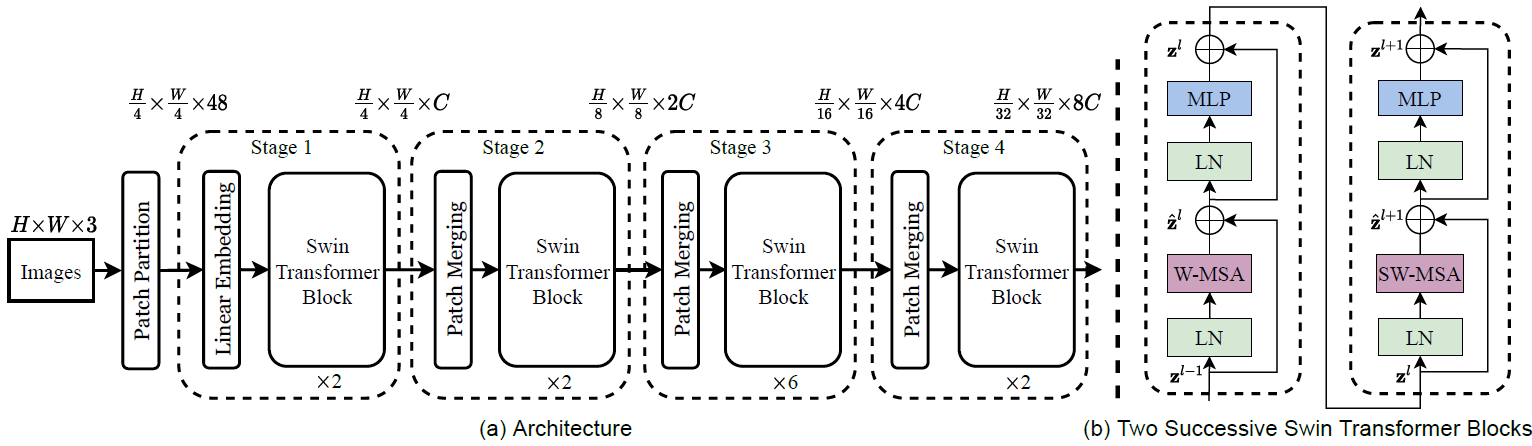

## 1. Swin Transformer Models

| **index** | **model**                                            |
|-----------|------------------------------------------------------|
| 1         | [image_classifier_swin_base_patch4_window12_384_in22k](https://sparknlp.org/2023/02/07/image_classifier_swin_base_patch4_window12_384_in22k_en.html) |
| 2         | [image_classifier_swin_base_patch4_window7_224](https://sparknlp.org/2023/02/07/image_classifier_swin_base_patch4_window7_224_in22k_en.html)        |
| 3         | [image_classifier_swin_base_patch4_window7_224_in22k](https://sparknlp.org/2023/02/07/image_classifier_swin_base_patch4_window7_224_in22k_en.html)  |
| 4         | [image_classifier_swin_tiny_patch4_window7_224](https://sparknlp.org/2023/02/07/image_classifier_swin_tiny_patch4_window7_224_en.html)        |

You can find all Swin Transformer models and more in [NLP Models Hub](https://nlp.johnsnowlabs.com/models?q=Swin+Transformer&type=model).

## 2. Additional blogposts and videos:


*   [Swin Transformer - Hugging Face](https://huggingface.co/docs/transformers/model_doc/swin)
*   [Swin Transformer - Microsoft Official Github Repo](https://github.com/microsoft/Swin-Transformer)
*   [A Comprehensive Guide to Microsoft’s Swin Transformer](https://towardsdatascience.com/a-comprehensive-guide-to-swin-transformer-64965f89d14c)
*   [Swin Transformer paper animated and explained - Video](https://www.youtube.com/watch?v=SndHALawoag&ab_channel=AICoffeeBreakwithLetitia)

## 3. Pipeline with Swin Transformer

In [16]:
imageAssembler = ImageAssembler() \
    .setInputCol("image") \
    .setOutputCol("image_assembler")

imageClassifier = SwinForImageClassification \
    .pretrained() \
    .setInputCols(["image_assembler"]) \
    .setOutputCol("classes")

pipeline = Pipeline(
    stages=[
        image_assembler,
        image_classifier,
])

model = pipeline.fit(data_df)

image_classifier_swin_base_patch4_window7_224 download started this may take some time.
Approximate size to download 103 MB
[OK!]


In [17]:
# let us check the counts of classes in this model

len(image_classifier.getClasses())

999

In [18]:
image_classifier.getClasses()

['turnstile',
 'damselfly',
 'mixing bowl',
 'sea snake',
 'cockroach, roach',
 'buckle',
 'beer glass',
 'bulbul',
 'lumbermill, sawmill',
 'whippet',
 'Australian terrier',
 'television, television system',
 'hoopskirt, crinoline',
 'horse cart, horse-cart',
 'guillotine',
 'malamute, malemute, Alaskan malamute',
 'coyote, prairie wolf, brush wolf, Canis latrans',
 'colobus, colobus monkey',
 'hognose snake, puff adder, sand viper',
 'sock',
 'burrito',
 'printer',
 'bathing cap, swimming cap',
 'chiton, coat-of-mail shell, sea cradle, polyplacophore',
 'Rottweiler',
 'cello, violoncello',
 'pitcher, ewer',
 'computer keyboard, keypad',
 'bow',
 'peacock',
 'ballplayer, baseball player',
 'refrigerator, icebox',
 'solar dish, solar collector, solar furnace',
 'passenger car, coach, carriage',
 'African chameleon, Chamaeleo chamaeleon',
 'oboe, hautboy, hautbois',
 'toyshop',
 'Leonberg',
 'howler monkey, howler',
 'bluetick',
 'African elephant, Loxodonta africana',
 'American lobste

Lets transform the data.

In [19]:
image_df = model.transform(data_df)

In [20]:
image_df.printSchema()

root
 |-- image: struct (nullable = true)
 |    |-- origin: string (nullable = true)
 |    |-- height: integer (nullable = true)
 |    |-- width: integer (nullable = true)
 |    |-- nChannels: integer (nullable = true)
 |    |-- mode: integer (nullable = true)
 |    |-- data: binary (nullable = true)
 |-- image_assembler: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- origin: string (nullable = true)
 |    |    |-- height: integer (nullable = false)
 |    |    |-- width: integer (nullable = false)
 |    |    |-- nChannels: integer (nullable = false)
 |    |    |-- mode: integer (nullable = false)
 |    |    |-- result: binary (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 |-- classes: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorTyp

In [21]:
image_df.show(truncate=40)

+----------------------------------------+----------------------------------------+----------------------------------------+
|                                   image|                         image_assembler|                                 classes|
+----------------------------------------+----------------------------------------+----------------------------------------+
|{file:///content/images/images/palace...|[{image, file:///content/images/image...|[{category, 0, 5, palace, {nChannels ...|
|{file:///content/images/images/egypti...|[{image, file:///content/images/image...|[{category, 0, 11, Egyptian cat, {nCh...|
|{file:///content/images/images/hippop...|[{image, file:///content/images/image...|[{category, 0, 55, hippopotamus, hipp...|
|{file:///content/images/images/hen.JP...|[{image, file:///content/images/image...|[{category, 0, 2, hen, {nChannels -> ...|
|{file:///content/images/images/ostric...|[{image, file:///content/images/image...|[{category, 0, 24, ostrich, Struthio ...|


In [22]:
image_df \
    .selectExpr("reverse(split(image.origin, '/'))[0] as image_name", "classes.result") \
    .show(truncate=False)

+-----------------+----------------------------------------------------------+
|image_name       |result                                                    |
+-----------------+----------------------------------------------------------+
|palace.JPEG      |[palace]                                                  |
|egyptian_cat.jpeg|[Egyptian cat]                                            |
|hippopotamus.JPEG|[hippopotamus, hippo, river horse, Hippopotamus amphibius]|
|hen.JPEG         |[hen]                                                     |
|ostrich.JPEG     |[ostrich, Struthio camelus]                               |
|junco.JPEG       |[junco, snowbird]                                         |
|bluetick.jpg     |[bluetick]                                                |
|chihuahua.jpg    |[Chihuahua]                                               |
|tractor.JPEG     |[tractor]                                                 |
|ox.JPEG          |[ox]                             

Now we can check the classes.

In [23]:
image_df.select('classes').show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|classes                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [24]:
image_df.select(F.explode(F.arrays_zip(image_df.classes.metadata,
                                       image_df.classes.result)).alias("cols"))\
        .select(F.expr("cols['0']['origin']").alias("images"),
                F.expr("cols['0']['width']").alias("width"),
                F.expr("cols['0']['height']").alias("height"),
                F.expr("cols['1']").alias("class")).show(truncate=False)

+-----------------------------------------------+-----+------+--------------------------------------------------------+
|images                                         |width|height|class                                                   |
+-----------------------------------------------+-----+------+--------------------------------------------------------+
|file:///content/images/images/palace.JPEG      |500  |334   |palace                                                  |
|file:///content/images/images/egyptian_cat.jpeg|640  |480   |Egyptian cat                                            |
|file:///content/images/images/hippopotamus.JPEG|500  |333   |hippopotamus, hippo, river horse, Hippopotamus amphibius|
|file:///content/images/images/hen.JPEG         |500  |375   |hen                                                     |
|file:///content/images/images/ostrich.JPEG     |300  |400   |ostrich, Struthio camelus                               |
|file:///content/images/images/junco.JPE

## 4. Light Pipeline

In [25]:
light_pipeline = LightPipeline(model)

image_list = ["/content/images/images/bluetick.jpg",
              "/content/images/images/palace.JPEG",
              "/content/images/images/hen.JPEG"]

annotations_result = light_pipeline.fullAnnotateImage(image_list)
annotations_result[0].keys()

dict_keys(['image_assembler', 'classes'])

In [26]:
file_name = []
classes = []

for i in annotations_result:

    file_name.append(i["image_assembler"][0].origin.split("/")[-1])
    classes.append(i["classes"][0].result)


df_images = pd.DataFrame({'file':file_name,
                          'class':classes})

df_images

,file,class
0,bluetick.jpg,bluetick
1,palace.JPEG,palace
2,hen.JPEG,hen


# ConvNeXT Image Classification

ConvNextForImageClassification can load ConvNeXT models that compete favorably with Transformers in terms of accuracy and scalability, achieving 87.8% ImageNet top-1 accuracy and outperforming Swin Transformers on COCO detection and ADE20K segmentation, while maintaining the simplicity and efficiency of standard ConvNets.




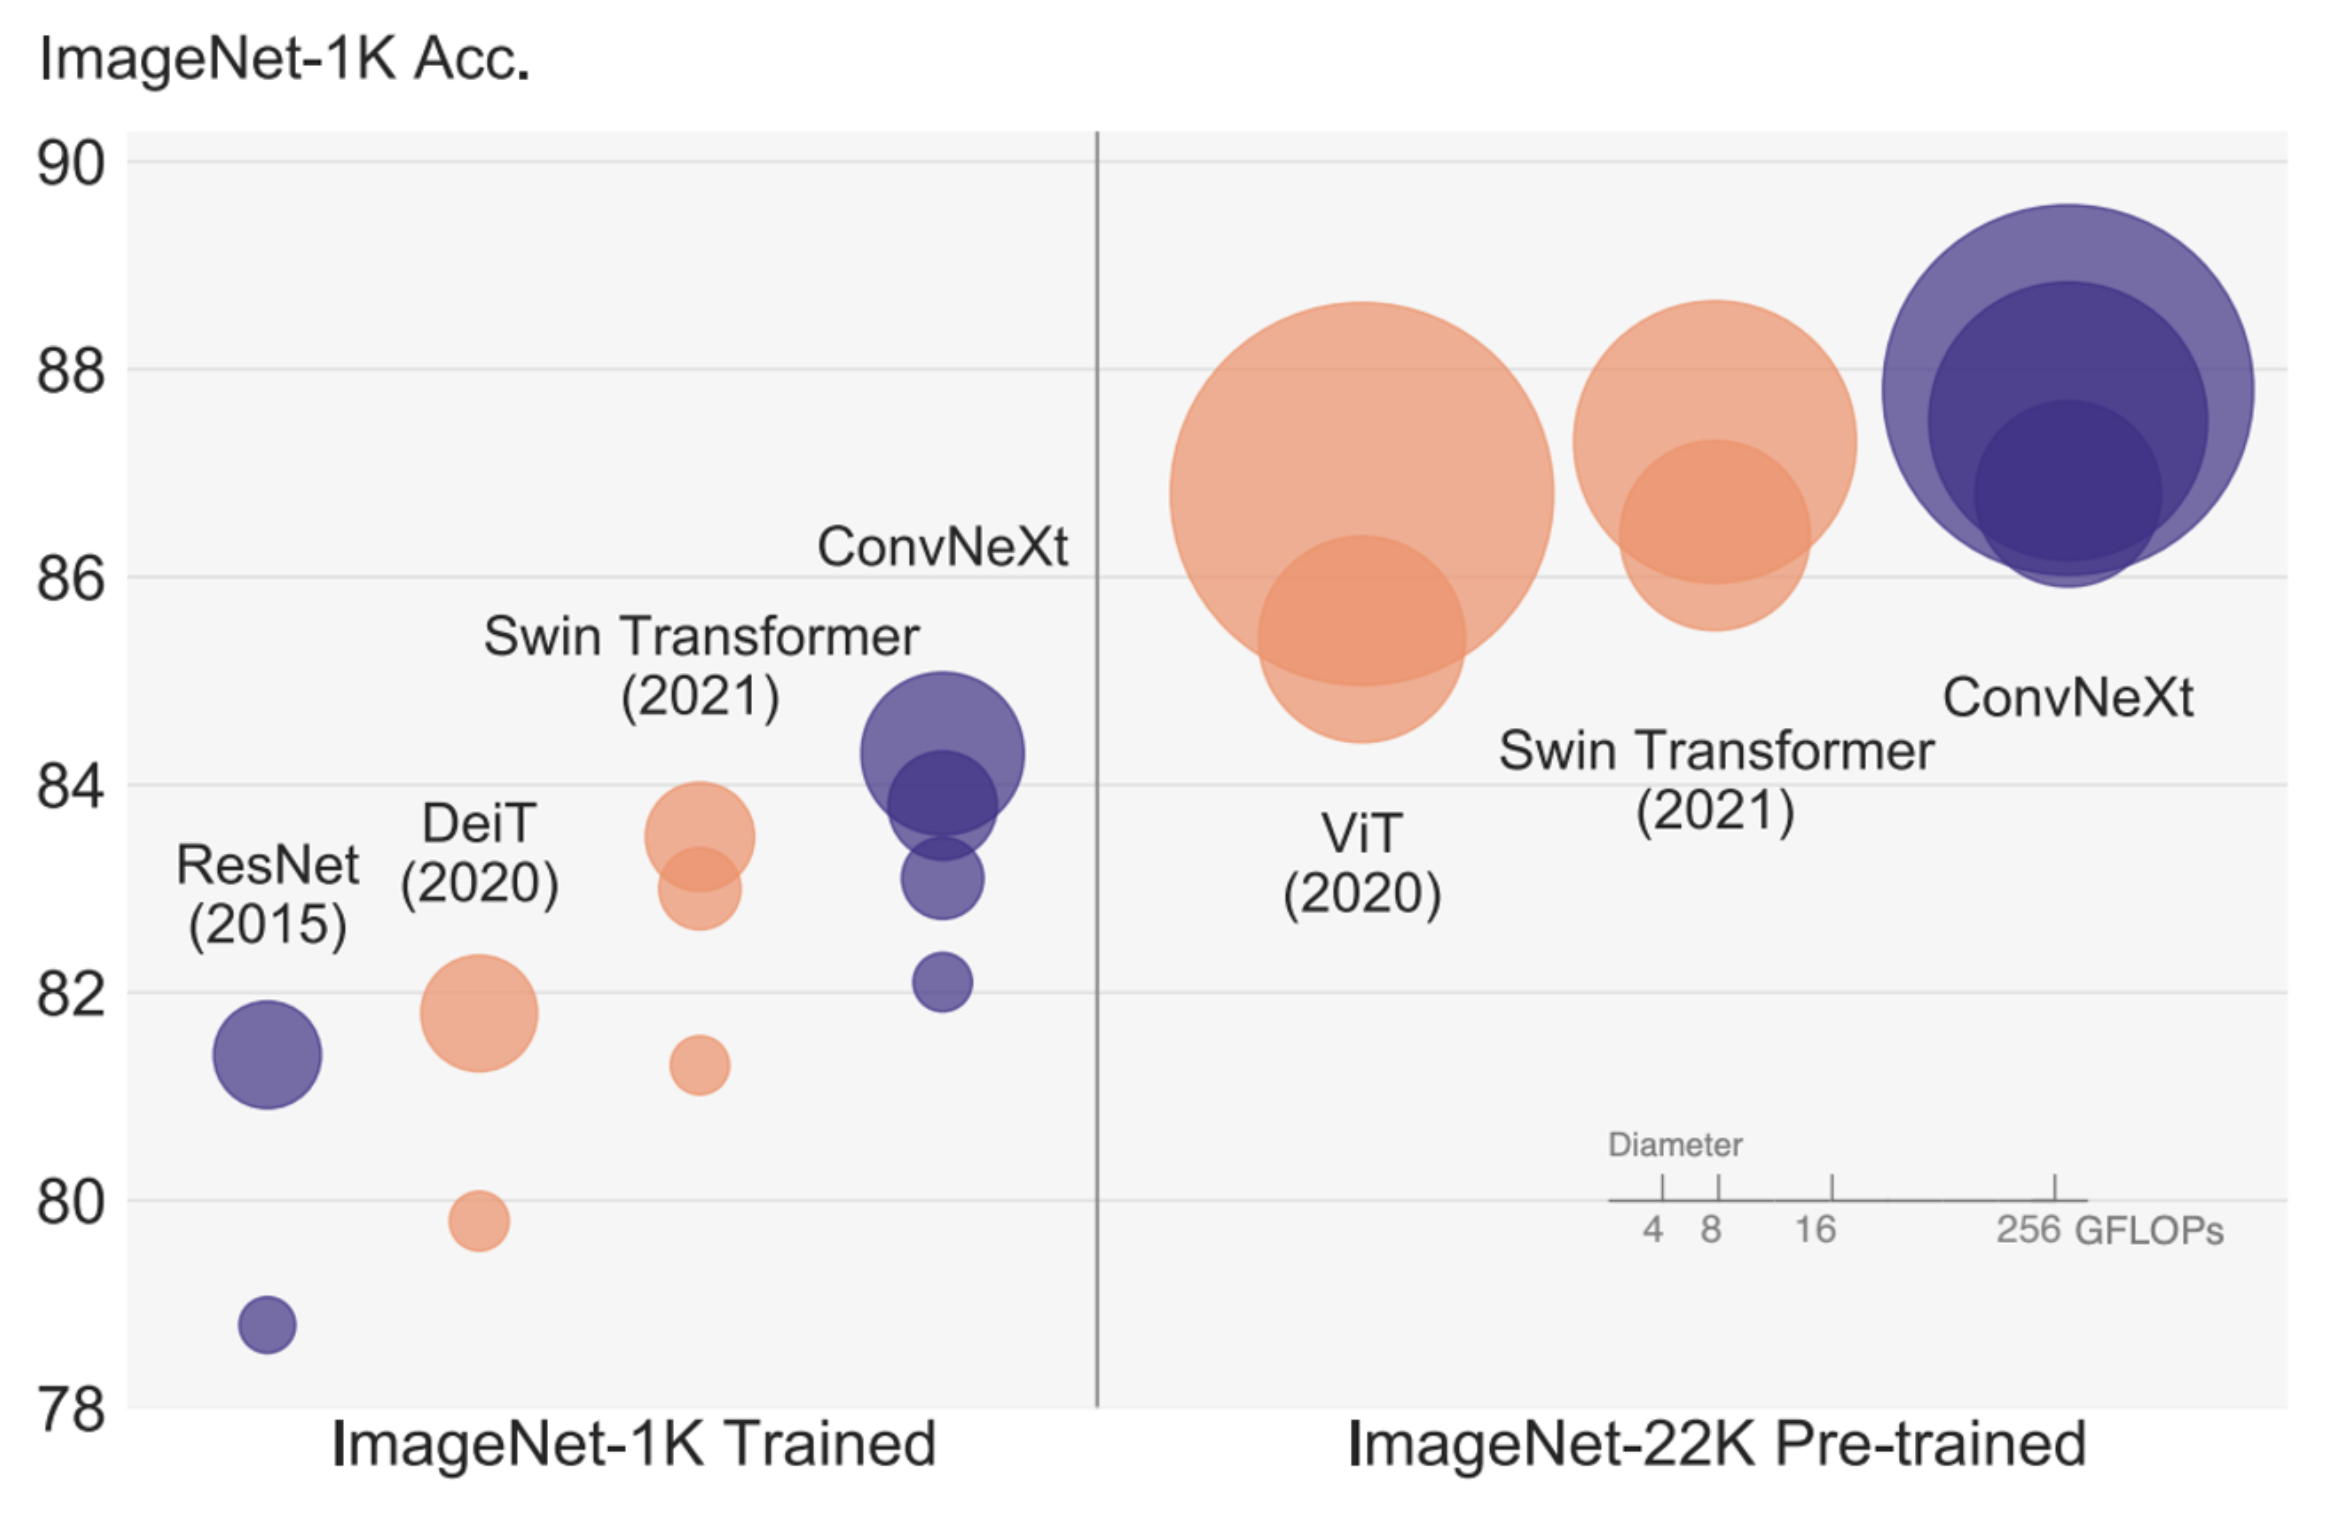

## 1. ConvNext Transformer Models

| **index** | **model**                                            |
|-----------|------------------------------------------------------|
| 1         | [image_classifier_convnext_tiny_224_local](https://sparknlp.org/2023/03/28/image_classifier_convnext_tiny_224_local_en.html) |


 ## 2- Additional blogposts and videos:


*   [ConvNeXT Transformer - Hugging Face](https://huggingface.co/docs/transformers/main/model_doc/convnext)
*   [A ConvNet for the 2020s](https://arxiv.org/pdf/2201.03545.pdf)
*   [ConvNext: The Return Of Convolution Networks](https://medium.com/augmented-startups/convnext-the-return-of-convolution-networks-e70cbe8dabcc)
*   [ConvNeXt: A ConvNet for the 2020s | Paper Explained - Video](https://www.youtube.com/watch?v=idiIllIQOfU)

## 3- Pipeline with ConvNextForImageClassification

In [27]:
imageAssembler = ImageAssembler() \
    .setInputCol("image") \
    .setOutputCol("image_assembler")

imageClassifier = ConvNextForImageClassification \
    .pretrained() \
    .setInputCols(["image_assembler"]) \
    .setOutputCol("classes")

pipeline = Pipeline(
    stages=[
        imageAssembler,
        imageClassifier,
])

model = pipeline.fit(data_df)

image_classifier_convnext_tiny_224_local download started this may take some time.
Approximate size to download 102.6 MB
[OK!]


In [28]:
# let us check the counts of classes in this model

len(imageClassifier.getClasses())

999

In [29]:
imageClassifier.getClasses()

['turnstile',
 'damselfly',
 'mixing bowl',
 'sea snake',
 'cockroach, roach',
 'buckle',
 'beer glass',
 'bulbul',
 'lumbermill, sawmill',
 'whippet',
 'Australian terrier',
 'television, television system',
 'hoopskirt, crinoline',
 'horse cart, horse-cart',
 'guillotine',
 'malamute, malemute, Alaskan malamute',
 'coyote, prairie wolf, brush wolf, Canis latrans',
 'colobus, colobus monkey',
 'hognose snake, puff adder, sand viper',
 'sock',
 'burrito',
 'printer',
 'bathing cap, swimming cap',
 'chiton, coat-of-mail shell, sea cradle, polyplacophore',
 'Rottweiler',
 'cello, violoncello',
 'pitcher, ewer',
 'computer keyboard, keypad',
 'bow',
 'peacock',
 'ballplayer, baseball player',
 'refrigerator, icebox',
 'solar dish, solar collector, solar furnace',
 'passenger car, coach, carriage',
 'African chameleon, Chamaeleo chamaeleon',
 'oboe, hautboy, hautbois',
 'toyshop',
 'Leonberg',
 'howler monkey, howler',
 'bluetick',
 'African elephant, Loxodonta africana',
 'American lobste

In [30]:
image_df = model.transform(data_df)

In [31]:
image_df.printSchema()

root
 |-- image: struct (nullable = true)
 |    |-- origin: string (nullable = true)
 |    |-- height: integer (nullable = true)
 |    |-- width: integer (nullable = true)
 |    |-- nChannels: integer (nullable = true)
 |    |-- mode: integer (nullable = true)
 |    |-- data: binary (nullable = true)
 |-- image_assembler: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- origin: string (nullable = true)
 |    |    |-- height: integer (nullable = false)
 |    |    |-- width: integer (nullable = false)
 |    |    |-- nChannels: integer (nullable = false)
 |    |    |-- mode: integer (nullable = false)
 |    |    |-- result: binary (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 |-- classes: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorTyp

In [32]:
image_df.show(truncate=40)

+----------------------------------------+----------------------------------------+----------------------------------------+
|                                   image|                         image_assembler|                                 classes|
+----------------------------------------+----------------------------------------+----------------------------------------+
|{file:///content/images/images/palace...|[{image, file:///content/images/image...|[{category, 0, 5, palace, {nChannels ...|
|{file:///content/images/images/egypti...|[{image, file:///content/images/image...|[{category, 0, 15, tabby, tabby cat, ...|
|{file:///content/images/images/hippop...|[{image, file:///content/images/image...|[{category, 0, 55, hippopotamus, hipp...|
|{file:///content/images/images/hen.JP...|[{image, file:///content/images/image...|[{category, 0, 2, hen, {nChannels -> ...|
|{file:///content/images/images/ostric...|[{image, file:///content/images/image...|[{category, 0, 24, ostrich, Struthio ...|


In [33]:
image_df \
    .selectExpr("reverse(split(image.origin, '/'))[0] as image_name", "classes.result") \
    .show(truncate=False)

+-----------------+----------------------------------------------------------+
|image_name       |result                                                    |
+-----------------+----------------------------------------------------------+
|palace.JPEG      |[palace]                                                  |
|egyptian_cat.jpeg|[tabby, tabby cat]                                        |
|hippopotamus.JPEG|[hippopotamus, hippo, river horse, Hippopotamus amphibius]|
|hen.JPEG         |[hen]                                                     |
|ostrich.JPEG     |[ostrich, Struthio camelus]                               |
|junco.JPEG       |[junco, snowbird]                                         |
|bluetick.jpg     |[bluetick]                                                |
|chihuahua.jpg    |[Chihuahua]                                               |
|tractor.JPEG     |[thresher, thrasher, threshing machine]                   |
|ox.JPEG          |[ox]                             

In [34]:
image_df.select('classes').show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|classes                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [35]:
image_df.select(F.explode(F.arrays_zip(image_df.classes.metadata,
                                       image_df.classes.result)).alias("cols"))\
        .select(F.expr("cols['0']['origin']").alias("images"),
                F.expr("cols['0']['width']").alias("width"),
                F.expr("cols['0']['height']").alias("height"),
                F.expr("cols['1']").alias("class")).show(truncate=False)

+-----------------------------------------------+-----+------+--------------------------------------------------------+
|images                                         |width|height|class                                                   |
+-----------------------------------------------+-----+------+--------------------------------------------------------+
|file:///content/images/images/palace.JPEG      |500  |334   |palace                                                  |
|file:///content/images/images/egyptian_cat.jpeg|640  |480   |tabby, tabby cat                                        |
|file:///content/images/images/hippopotamus.JPEG|500  |333   |hippopotamus, hippo, river horse, Hippopotamus amphibius|
|file:///content/images/images/hen.JPEG         |500  |375   |hen                                                     |
|file:///content/images/images/ostrich.JPEG     |300  |400   |ostrich, Struthio camelus                               |
|file:///content/images/images/junco.JPE

## 4- Light Pipeline

In [36]:
light_pipeline = LightPipeline(model)

image_list = ["/content/images/images/bluetick.jpg",
              "/content/images/images/palace.JPEG",
              "/content/images/images/hen.JPEG"]

annotations_result = light_pipeline.fullAnnotateImage(image_list)
annotations_result[0].keys()

dict_keys(['image_assembler', 'classes'])

In [37]:
import pandas as pd

file_name = []
classes = []

for i in annotations_result:

    file_name.append(i["image_assembler"][0].origin.split("/")[-1])
    classes.append(i["classes"][0].result)


df_images = pd.DataFrame({'file':file_name,
                          'class':classes})

df_images

,file,class
0,bluetick.jpg,bluetick
1,palace.JPEG,palace
2,hen.JPEG,hen
